### 190648C
### VIKASITHA K.S.S.
#### ASSIGNMENT 01

$Q1$

In [5]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import random
#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x , y = (r + n)*np.cos(t) , (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1) , y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))
# fig, ax = plt.subplots(figsize=(10,10))
# ax.scatter(X[:,0], X[:,1])
# # ax.axis('off')
# plt.show()

$Q1$ $(a)$

In [6]:
def circleEstimate(min_iterations, min_inliers, no_of_points, points, inlier_treshold):
    its = min_iterations
    max_inliers = 0
    while max_inliers < min_inliers or its > 0:
        # Randomly choose 3 points
        sample = random.sample(range(1, no_of_points), 3)
        x1 = np.zeros([3,2])
        for i in range(3):
            x1[i]=points[sample[i]]
        
        # Calculate the coordinates of the center & the radius of the circle passing through those 3 points
        x2 = np.hstack((x1,np.ones((3,1))))
        x3 = (-1*((x1[:,0]*x1[:,0])+(x1[:,1]*x1[:,1]))).reshape(3,1)
        c = np.matmul(np.linalg.inv(x2),x3)
        c_x , c_y = -c[0]/2 , -c[1]/2
        radius = np.sqrt(c_x*c_x + c_y*c_y - c[2])

        if radius > 30:continue
        
        no_of_inliers, inlier_points = inlierCount(points, c_x, c_y, radius, inlier_treshold) # Find inliers
        
        # Check whether it is the best model with most inliers
        if max_inliers < no_of_inliers:
            max_inliers, circle_parameters, best_inlier_points, best_sample = no_of_inliers, [c_x,c_y,radius], inlier_points, x1
        if max_inliers >= min_inliers:
            its-=1
    
    return max_inliers, circle_parameters, best_inlier_points, best_sample

# Check whether a given point is an inlier or not
def isInlier(x, y, cx, cy, r, T):
    r_=(x-cx)**2+(y-cy)**2
    if r-T < np.sqrt(r_) < r+T:
        return True
    else: return False

# Find inliers of a given circle
def inlierCount(points, cx, cy, r, T):
    n=0
    inlier_arr=np.zeros((1,2))
    for i in points:
        if isInlier(i[0], i[1], cx, cy, r, T):
            n+=1
            if not inlier_arr.any():
                inlier_arr[0]=i
            else:
                inlier_arr=np.concatenate((inlier_arr,[i]),axis=0)
    return n,inlier_arr

$Q1$ $(b)$

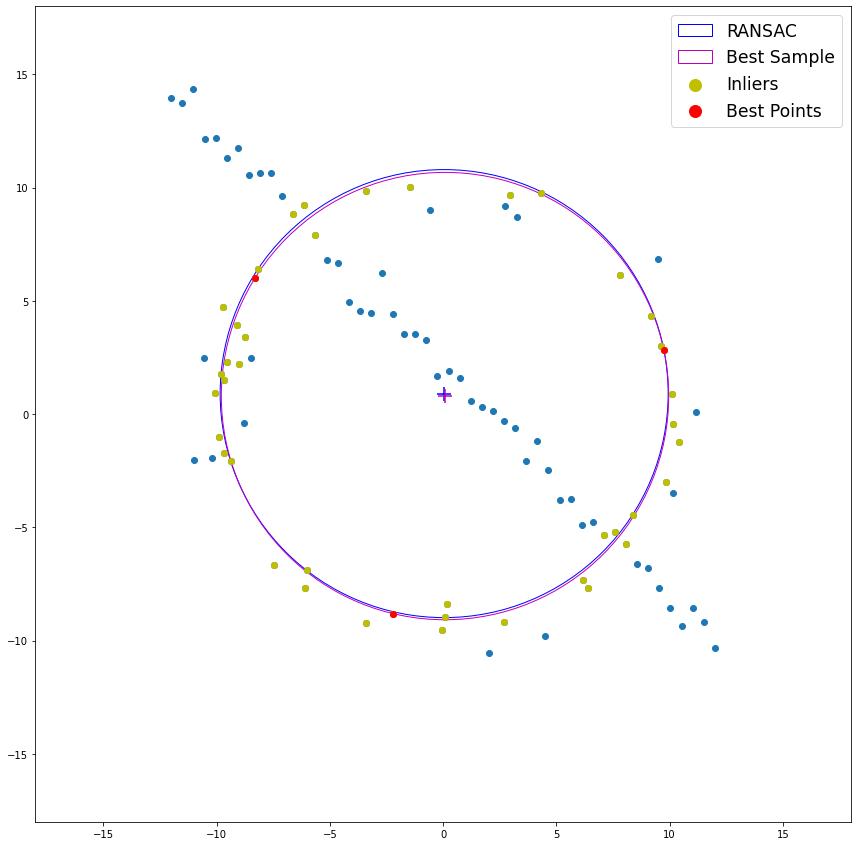

In [7]:
m1,circ,inls,bestpoints=circleEstimate(200,42,N,X,0.9)
figure, axes = plt.subplots(figsize=(15,15))
draw_circle = plt.Circle((circ[0], circ[1]), circ[2],fill=False,color='b',label='RANSAC')
axes.scatter(circ[0], circ[1],color='b',marker='+',s=180)
axes.set_aspect(1)
axes.add_artist(draw_circle)

m,circ,inls,bestpoints=circleEstimate(200,30,m1,inls,0.75)
draw_circle = plt.Circle((circ[0], circ[1]), circ[2],fill=False,color='m',label='Best Sample')
axes.add_artist(draw_circle)
axes.scatter(X[:,0], X[:,1])
axes.scatter(inls[:,0], inls[:,1],color='y',label='Inliers')
axes.scatter(bestpoints[:,0], bestpoints[:,1],color='r',label='Best Points')
axes.scatter(circ[0], circ[1],marker='+',c='m',s=180)
plt.xlim(-18,18)
plt.ylim(-18,18)
plt.legend(fontsize='xx-large',markerscale=2.0)
plt.show()

$Q2$

In [64]:
import cv2 as cv
point_matrix = np.zeros((4,2),dtype=np.float32)
 
counter = 0
def mouseClicks(event,x,y,flags,params):
    global counter
    if event == cv.EVENT_LBUTTONDOWN:
        point_matrix[counter] = x,y
        counter = counter + 1

im = cv.imread(r'Assignment-02 Materials\003.jpg')
assert im is not None

im1 = cv.imread(r'Assignment-02 Materials\Flag.png')
assert im1 is not None

im1=cv.resize(im1,(np.shape(im)[1],np.shape(im)[0]),interpolation = cv.INTER_AREA)
# print(np.shape(im1))
# print(np.shape(im))
# cv.imshow('img',im1)
# cv.waitKey(0)
# cv.destroyAllWindows()
cv.imshow('img',im)
cv.setMouseCallback('img',mouseClicks)
cv.waitKey(0)
print(point_matrix)
cv.destroyAllWindows()

H = cv.getPerspectiveTransform(np.array([[0, 0],[np.shape(im1)[1],0],[0,np.shape(im1)[0]],[np.shape(im1)[1],np.shape(im1)[0]]],dtype=np.float32), point_matrix)
warp = cv.warpPerspective(im1, H,(np.shape(im)[1],np.shape(im)[0]))
print(np.shape(warp))
# cv.imshow('img',warp)
# cv.waitKey(0)
# cv.destroyAllWindows()

result = cv.addWeighted(im, 0.8, warp, 0.2, 0.5)
cv.imshow('img',result)
cv.waitKey(0)
cv.destroyAllWindows()

[[383. 208.]
 [918. 180.]
 [358. 333.]
 [958. 311.]]
(768, 1024, 3)
